<a href="https://colab.research.google.com/github/sohyun-jang/sohyun-jang/blob/main/CV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 코랩과 드라이브 연결 (처음 연결 시 권한 승인이 필요함)
from google.colab import drive
drive.mount('/content/drive')

# 이미지 경로
IMG_PATH = "/content/drive/MyDrive/Colab_Notebooks/parrot.png"

# 혹시 파일을 못찾으면 에러 발생시키기
import os
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다:\n{IMG_PATH}")
else:
    print("이미지 경로 확인 완료")

Mounted at /content/drive
이미지 경로 확인 완료


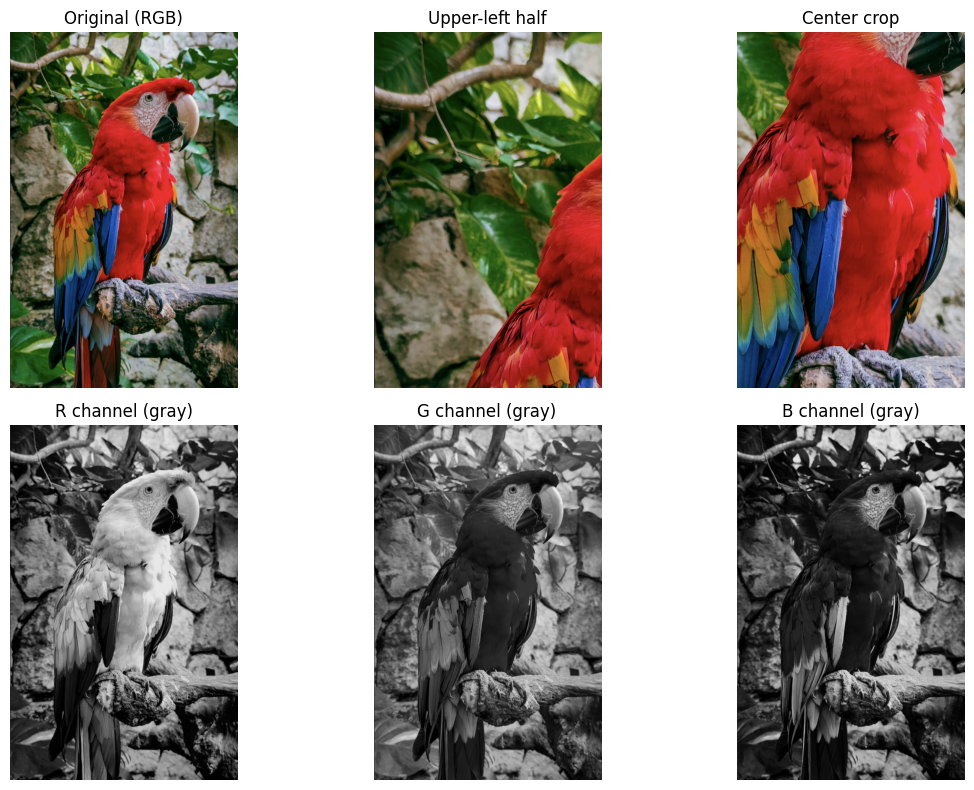

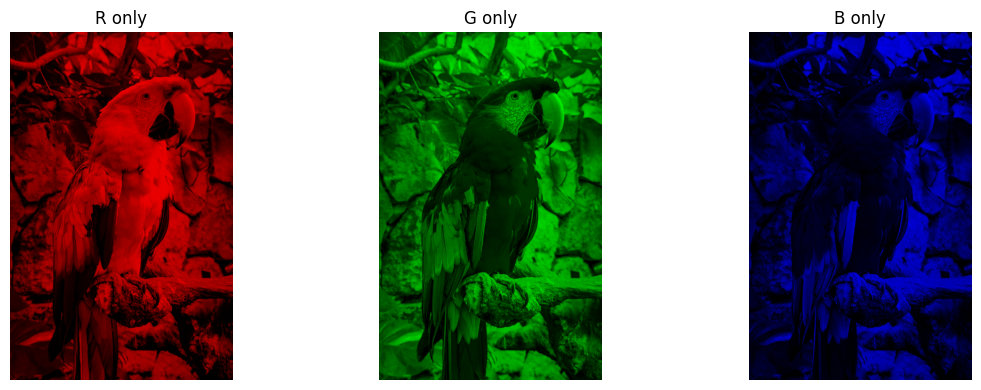

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# 이미지 읽기 (OpenCV는 BGR로 읽음)
parrot_img = cv.imread(IMG_PATH)
if parrot_img is None:
    raise FileNotFoundError("파일을 찾을 수 없습니다.")


# openCV는 이미지를 BRG 순서로 읽음
# 하지만 matplotlib은 RGB를 사용함
# BGR → RGB 변환 (matplotlib용)
# 입력: parrot_img
# 변환 방법: cv.COLOR_BGR2RGB
rgb = cv.cvtColor(parrot_img, cv.COLOR_BGR2RGB)
# 이미지 크기 추출
# NumPy 기본 배열 (행(세로), 열(가로), 채널(색상))
# H:height, W:width, C:channels 중 채널 수는 무시하고 두번째까지 가져오기
H, W = rgb.shape[:2]


# 영역 슬라이싱
# 영상 좌표계는 왼쪽 위가 원점(0,0)임
# 따라서 upper_left는
# '0:H//2' 높이:0부터 전체 높이의 절반까지, '0:W//2' 넓이:0부터 전체 넓이의 절반까지, ':' 채널: R, G, B 전부
upper_left = rgb[0:H//2, 0:W//2, :]
# 따라서 center은
# 'H//4:3*H//4' 높이: 전체 높이의 1/4 지점부터 3/4 지점까지, 'W//4:3*W//4' 넓이: 전체 넓이의 1/4 지점부터 3/4 지점까지, ':' 채널: R, G, B 전부
center = rgb[H//4:3*H//4, W//4:3*W//4, :]


# 채널 분리
# 입력: rgb는 3채널 컬러 이미지
# rgb.shape -> 예: (480, 640, 3)
#                  세로  가로  RGB

# cv.split으로 채널을 분리 시키면 3개의 2D 배열로 분리됨
# r.shape -> (480, 640) - R 채널
# g.shape -> (480, 640) - G 채널
# b.shape -> (480, 640) - B 채널

# 수동으로 분리하면 아래와 같이 할 수 있음
# r = rgb[:, :, 0] - R 채널
# g = rgb[:, :, 1] - G 채널
# b = rgb[:, :, 2] - B 채널
r, g, b = cv.split(rgb)
# 제로 배열 생성하기
# r에 대해서 제로 배열을 생성한 이유는 어차피 r, g, b 모두 shape과 dtype이 같이 때문 (r 대신 g나 b를 기준으로 제로 배열을 만들어도 상관없음)
# 제로 배열이 필요한 이유: 각 채널만 컬러로 표시하기 위해서 하나의 채널 제외 나머지에 0를 채워야 하기 때문에 zeros 사용행함
# 예시 목표: R 채널만 컬러로 표시 -> [R, 0, 0] 형태로 만들어야 함 (G->0, B->0)
# G와 B 자리에 0을 채우기 위해 zeros 사용
zeros = np.zeros_like(r)
# 채널 재조합
# np.stack()은 여러 배열을 쌓아서 합침
# axis=2인 이유: index 2는 채널 부분 (따라서 채널 방향으로 쌓는 것)
r_img = np.stack([r, zeros, zeros], axis=2) # R 채널만 컬러로 표현
g_img = np.stack([zeros, g, zeros], axis=2) # G 채널만 컬러로 표현
b_img = np.stack([zeros, zeros, b], axis=2) # B 채널만 컬러로 표현


# 시각화 (cv.imshow 대신 matplotlib)
# fig: 전체 그림판(캔버스) 불러오기
# figsize: 인치 단위의 그림판 크기(가로:12인지, 세로:8인치)
# 이때 해상도(dpi)가 100이면, 가로 픽셀 수: 12*100=1200px, 세로 픽셀 수: 8*100=800px
# axs: 각각의 작은 칸들(넘파이 배열)
# 목적: 2행 * 3열의 그림 격자 생성하기 (6개의 이미지를 한 화면에 질서 있게 배치하기 위해서)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0,0].imshow(rgb);        axs[0,0].set_title("Original (RGB)")
axs[0,1].imshow(upper_left); axs[0,1].set_title("Upper-left half")
axs[0,2].imshow(center);     axs[0,2].set_title("Center crop")

# cmap: color map(숫자값 -> 생각 으로 바꿔주는 색상표)
# cmap='gray'로 하면서, 각 채널별 배열의 숫자 0은 검정색, 255는 흰색, 그 사이 값은 회색 단계로 표시하라는 의미)
# 그레이맵을 사용하는 이유: 가독성(그레이맵은 밝기 왜곡이 적음. 다른 컬러맵(viridis 등)을 쓰면 채널 의미가 흐려질 수 있음)
# 예시(r 채널 기준): 빨강 채널이 높으면 픽셀이 밝게 보임
# vmin=0, vmax=225: 픽셀 밝기 값의 범위를 고정하기 (0=검정, 255=흰색)
common = dict(cmap='gray', vmin=0, vmax=255)
# **common: 같은 설정을 여러 곳에 동시에 적용할 수 있게 변수로 묶음
axs[1,0].imshow(r, **common); axs[1,0].set_title("R channel (gray)")
axs[1,1].imshow(g, **common); axs[1,1].set_title("G channel (gray)")
axs[1,2].imshow(b, **common); axs[1,2].set_title("B channel (gray)")

# 축 치우기 (눈금 또는 프레임 제거하기)
# 모든 서브플롯의 좌표축(눈금/테두리)을 숨길 수 있음 (이미지만 깔끔하게 보일 수 있도록)
# .ravel로 (2,3)배열을 1차원으로 펼친 후 반복 작업
for ax in axs.ravel():
    ax.axis('off')
# .tight_layout(): 제목과 그림, 서브플롯 간격이 겹치지 않도록 자동 조정함
plt.tight_layout()
plt.show()

# 채널 강조 이미지 (R/G/B만 컬러로)
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))
# r_img를 사용했기 때문에 R값이 큰 부분은 빨갛게, 나머지는 검정으로
# R값이 클 수록 밝은 빨강, R값이 0일 수록 검정
# 나머지 G와 B의 값은 신경쓰지 않고, R값만 기준으로 0~225로 표현함
axs2[0].imshow(r_img); axs2[0].set_title("R only")
axs2[1].imshow(g_img); axs2[1].set_title("G only")
axs2[2].imshow(b_img); axs2[2].set_title("B only")
for ax in axs2.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()

R channel - mean: 98.39, var: 4190.61
G channel - mean: 86.53, var: 2776.16
B channel - mean: 66.98, var: 3453.25


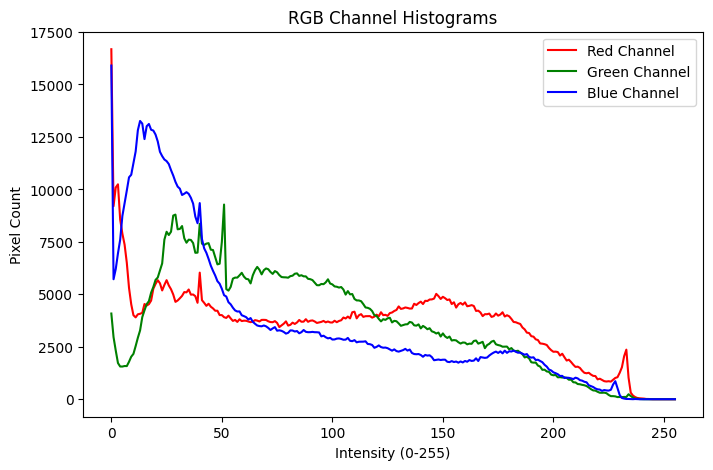

In [3]:
# 각 채널별 히스토그램 계산
# images: 입력 이미지(리스트 형태로 전달) -> [r], [g], [b]
# channels: 사용할 채널 인덱스 -> [0](회색 1채널이니까 0번째만 존재)
# mask: 특정 영역만 분석하고 싶을 때 마스크 이미지 -> None(전체 이미지 사용)
# histSize: 히스토그램의 bin(구간) 개수 -> [256](밝기 0~225를 1씩 쪼갬)
# ranges: 필셀 값의 범위 -> [0, 256](0포함, 256 미포함)
r_hist = cv.calcHist([r], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g], [0], None, [256], [0, 256])
b_hist = cv.calcHist([b], [0], None, [256], [0, 256])

# bins = 히스토그램에서 '밝기 값'(intensity value)의 목록
# np.arange(256): 0부터 255까지 숫자를 자동으로 생성하는 함수 (픽셀 값은 0~255까지 256개 이기 때문)
# .reshape(-1, 1): 배열의 모양(shape)를 열 벡터로 바꾸는 함수 (히스토그램(256×1)과 곱할 때 shape이 맞아야 함. hist도 OpenCV에서는 (256, 1) 형태라서 브로드캐스팅으로 자연스럽게 연산 가능하게 만들기 위한 것)
# .astype(np.float32): 배열의 data type을 np.float32로 바꾸는 함수
# data type을 바꾸는 이유 1: 연산 정확도 확보 (평균 계산: 밝기 값 * 픽셀 개수, 분산 계산: (i-mean)^2*hist[i] 와 같은 계산들은 전부 실수(float) 연산이므로 정수(int)로 두면 오류 또는 손실이 남)
# data type을 바꾸는 이유 2: 영상처리 기본 dtype과 맞추기 (영상, 머신러닝, 연산에서 numpy는 float32가 메모리 효율과 GPU 호환성이 좋아 일반적으로 float32를 이용함)
# data type을 바꾸는 이유 3: OpenCV 함수들과의 일관성 (OpenCV 히스토그램도 float32로 계산됨. 따라서 bins도 float32로 맞춰야 연산이 안전함)
# float 32인 이유: float64도 가능하지만, 메모리 절약과 GPU에서 더 빠르고 효율적이기 때문에 일반적으로 float32 사용함
bins = np.arange(256).reshape(-1, 1).astype(np.float32)

def mean_var_from_hist(hist):
    """
    hist: (256, 1) 형태의 히스토그램 (cv.calcHist 결과)
    반환: (mean, var)
    """
    # 전체 픽셀 수
    N = hist.sum()

    # 평균: Σ (i * hist[i]) / N
    mean = (bins * hist).sum() / N

    # 분산: Σ ((i - mean)^2 * hist[i]) / N
    var = (((bins - mean) ** 2) * hist).sum() / N

    return float(mean), float(var)

r_mean, r_var = mean_var_from_hist(r_hist)
g_mean, g_var = mean_var_from_hist(g_hist)
b_mean, b_var = mean_var_from_hist(b_hist)

print(f"R channel - mean: {r_mean:.2f}, var: {r_var:.2f}")
print(f"G channel - mean: {g_mean:.2f}, var: {g_var:.2f}")
print(f"B channel - mean: {b_mean:.2f}, var: {b_var:.2f}")

# 그래프로 표시
# plt.figure(): 히스토그램 시각화(새로운 그림 생성) -> 이전 서브플롯(fig,axs)과는 별개의 독립 figure
plt.figure(figsize=(8,5))
# plt.plot(): 세 채널의 히스토그램을 같은 좌표 위에 겹쳐서 그림
# color = 'r'/'g'/'b'로 실제 색상과 동일하게 표시함
# x축: 픽셀 밝기(0=어둠, 255=밝음)
# y축: 해당 밝기 필셀의 개수(빈도)
plt.plot(r_hist, color='r', label='Red Channel')
plt.plot(g_hist, color='g', label='Green Channel')
plt.plot(b_hist, color='b', label='Blue Channel')
plt.title("RGB Channel Histograms")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
# legend(): 어떤 그래프가 R/G/B인지 표시함
plt.legend()
plt.show()
# 아래 그래프 분석

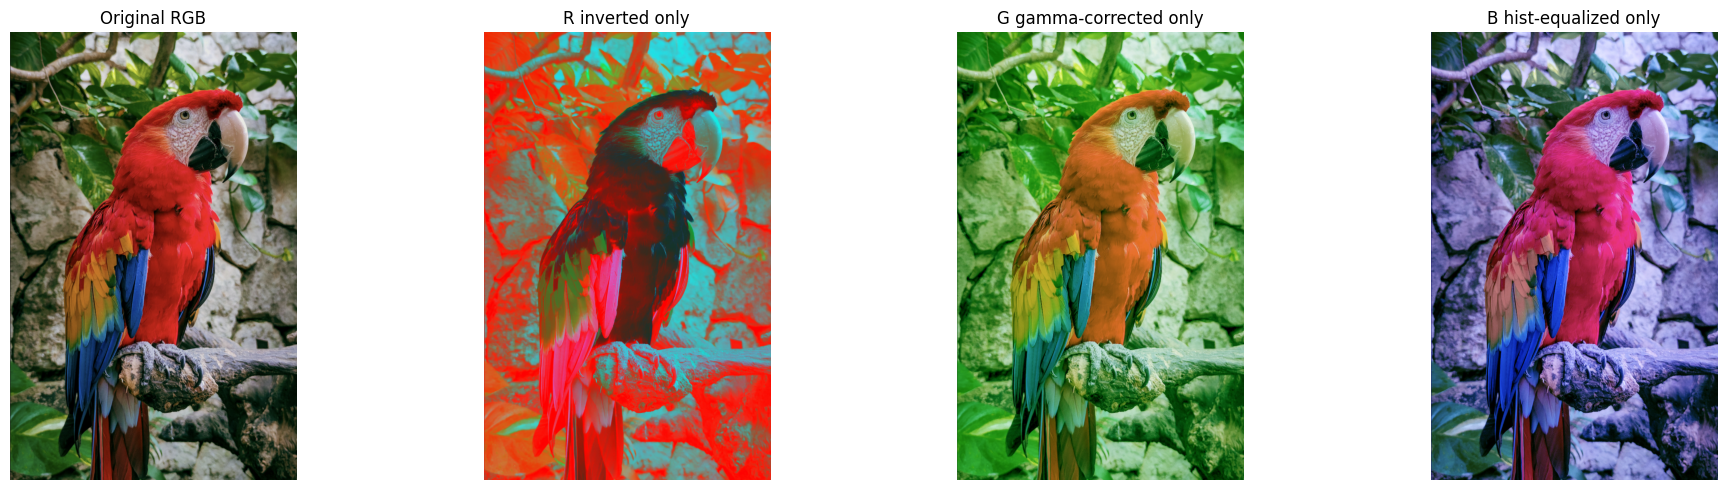

In [4]:
# (A) R 반전 / G 감마 / B 히스토그램 이퀄라이제이션 "각각만" 적용

# 공통 감마 값
gamma = 0.5

# ===== 1. R 채널 반전 =====
r_inv = 255 - r
img_r_inv_only = cv.merge([r_inv, g, b])  # R만 반전, G/B는 원본

# ===== 2. G 채널 감마 코렉션 =====
g_norm = g.astype(np.float32) / 255.0
g_gamma = np.power(g_norm, gamma)
g_gamma = np.clip(g_gamma * 255.0, 0, 255).astype(np.uint8)

img_g_gamma_only = cv.merge([r, g_gamma, b])  # G만 감마, R/B는 원본

# ===== 3. B 채널 히스토그램 이퀄라이제이션 =====
b_eq = cv.equalizeHist(b)
img_b_eq_only = cv.merge([r, g, b_eq])       # B만 이퀄라이즈, R/G는 원본


# ===== 4. 원본 + 3가지 결과 가로로 길게 시각화 =====
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # ★ 1행 4열로 변경

axs[0].imshow(rgb)
axs[0].set_title("Original RGB")
axs[0].axis('off')

axs[1].imshow(img_r_inv_only)
axs[1].set_title("R inverted only")
axs[1].axis('off')

axs[2].imshow(img_g_gamma_only)
axs[2].set_title("G gamma-corrected only")
axs[2].axis('off')

axs[3].imshow(img_b_eq_only)
axs[3].set_title("B hist-equalized only")
axs[3].axis('off')

plt.tight_layout()
plt.show()


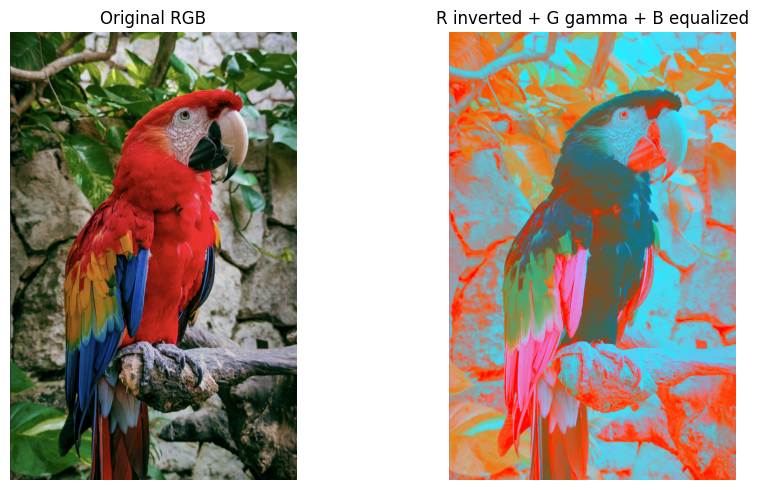

In [5]:
# -------------------------------
# (B) 최종: R 반전 + G 감마 + B 히스토그램 이퀄라이제이션 합치기
# -------------------------------

# R 채널 반전
r_inv = 255 - r

# (g_gamma, b_eq는 위에서 이미 구했으므로 그대로 사용)
rgb_processed = cv.merge([r_inv, g_gamma, b_eq])

# 원본 vs 최종 결과 비교
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))

axs2[0].imshow(rgb)
axs2[0].set_title("Original RGB")
axs2[0].axis('off')

axs2[1].imshow(rgb_processed)
axs2[1].set_title("R inverted + G gamma + B equalized")
axs2[1].axis('off')

plt.tight_layout()
plt.show()